In [1]:
#Loading necessary Libs for workshop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataframe with pandas from DataSet folder from the drive 
house_data = pd.read_csv('../DataSet/Workshop 3/house_data.csv', sep=",", decimal=".")
#Describe dataset specifications
#le dataset est déjà cleané dans le workshop 1
# nous avons enlevé les lignes ou un null ou Nan s'est glissé
house_data = house_data.dropna()
house_data = house_data[house_data["price"] < 8000]
house_data.describe()

,price,surface,arrondissement
count,812.000000,812.000000,812.000000
mean,1849.226601,55.177032,4.169951
std,1112.863687,35.554197,3.208448
min,390.000000,10.000000,1.000000
25%,1050.000000,28.282500,2.000000
50%,1550.000000,46.000000,3.000000
75%,2311.250000,71.737500,4.000000
max,7500.000000,235.000000,10.000000


<AxesSubplot:>

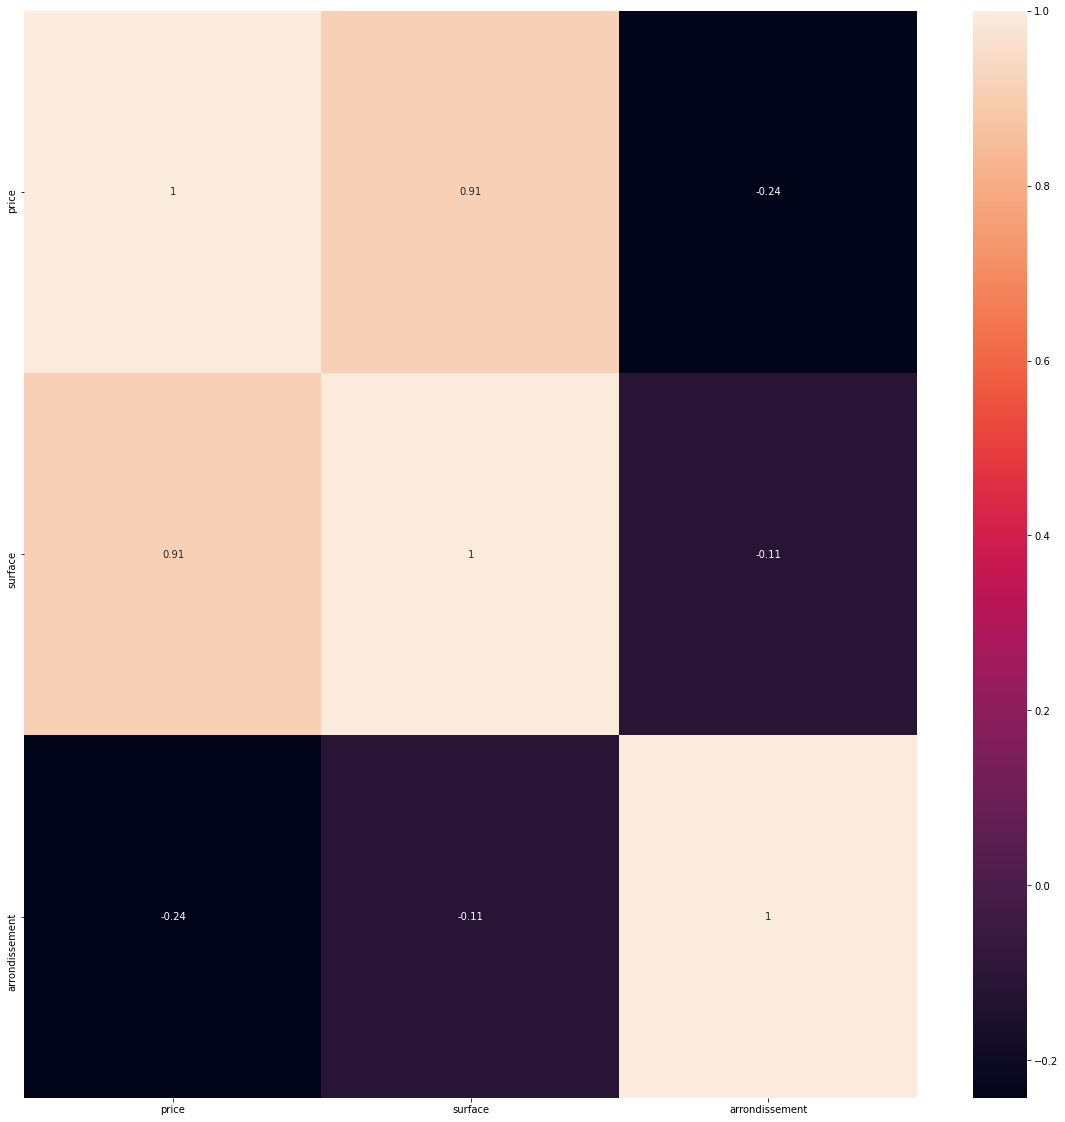

In [3]:
#let's observe the correlation through seaborn
correlations = house_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [4]:
house_data.describe()

,price,surface,arrondissement
count,812.000000,812.000000,812.000000
mean,1849.226601,55.177032,4.169951
std,1112.863687,35.554197,3.208448
min,390.000000,10.000000,1.000000
25%,1050.000000,28.282500,2.000000
50%,1550.000000,46.000000,3.000000
75%,2311.250000,71.737500,4.000000
max,7500.000000,235.000000,10.000000


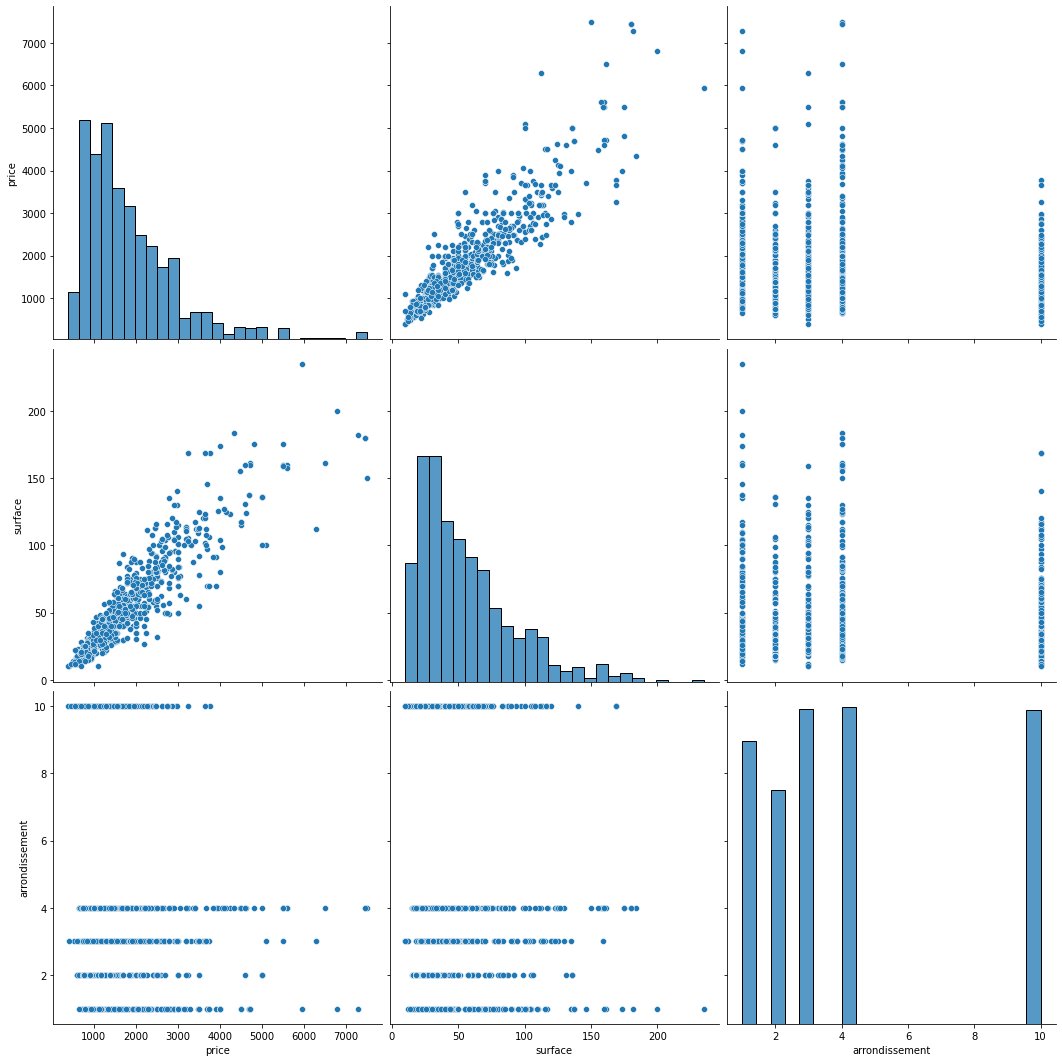

In [5]:
sns.pairplot(house_data, height=5)

<AxesSubplot:xlabel='price', ylabel='surface'>

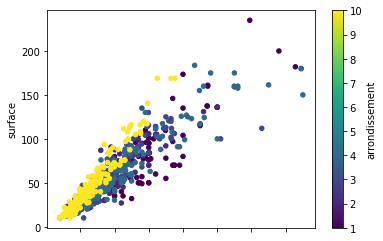

In [6]:
house_data.plot.scatter("price", "surface", c="arrondissement", colormap="viridis")
#on observe qu'il n'y a pas de loyer important dans le 10e 

In [7]:
#Let's keep surface and arrondissement as variables
#there is no need for OneHotEncoder as variables are already integer
X = house_data[["surface", "arrondissement"]]
y = house_data["price"]

In [8]:
#tryout split the dataset into 80/20 for training and testing. 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

<AxesSubplot:>

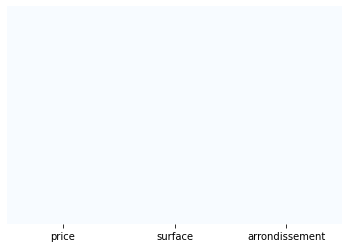

In [9]:
#check if there is still null value
sns.heatmap(house_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
#train the model with sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
#tryout the model with 35 square meters
#regr.predict([[0, 350]])

LinearRegression()

In [11]:
#check out prediction for 50 in the tenth 
regr.predict([[50, 10]])

array([1414.98550597])

In [12]:
#Model performance with the tested dataset for flat with price under 10K
error = (1-regr.score(xtest, ytest))*100
print(error)

13.772318824895347


In [13]:
#lets improve that by tweaking the model by surface limitation
#lets map the model error by surface step of 10 square meters 
errors2 = []
for s in range(20, 400, 10):
  #print(s)
  smallerSet = house_data[house_data["surface"] < s]
  #print(smallerSet.describe())
  X2 = smallerSet[["surface", "arrondissement"]]
  y2 = smallerSet["price"]
  #tryout split the dataset into 80/20 for training and testing. 
  xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2, train_size=0.8)
  regr2 = linear_model.LinearRegression()
  regr2.fit(xtrain2, ytrain2)
  error = (1-regr2.score(xtest, ytest))*100
  errors2.append(error)
  

13.728346135132142


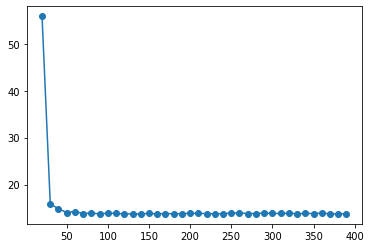

In [14]:
print(min(errors2))
import matplotlib.pyplot as plt
#plt.
plt.plot(range(20,400, 10), errors2, 'o-')
plt.show()
#le modèle semble plus précis si on limite le dataset à une surface de 200 mètres carrés environ. Au delà cela créé du bruit. 

In [15]:
#lets have the same approach with price
#lets map the model error by price step of 100€
errors2 = []
for s in range(500, 8000, 500):
  smallerSet = house_data[house_data["price"] < s]
  X2 = smallerSet[["surface", "arrondissement"]]
  y2 = smallerSet["price"]
  #tryout split the dataset into 80/20 for training and testing. 
  xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2, train_size=0.8)
  regr2 = linear_model.LinearRegression()
  regr2.fit(xtrain2, ytrain2)
  error = (1-regr2.score(xtest, ytest))*100
  errors2.append(error)

13.74125796916761


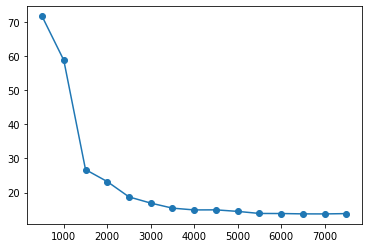

In [16]:
print(min(errors2))
import matplotlib.pyplot as plt
#plt.
plt.plot(range(500,8000, 500), errors2, 'o-')
plt.show()
#le modèle semble beaucoup plus performant avec les données dont le prix est inferieur à 6000€

In [17]:
#modele optimisé 
best_model = house_data[house_data["surface"] < 180]
best_model = best_model[best_model["price"] < 8000]
best_model.describe()

,price,surface,arrondissement
count,806.000000,806.000000,806.000000
mean,1814.270471,54.147717,4.182382
std,1035.787957,33.571296,3.214523
min,390.000000,10.000000,1.000000
25%,1050.000000,28.207500,2.000000
50%,1550.000000,45.095000,3.000000
75%,2300.000000,71.000000,4.000000
max,7500.000000,175.000000,10.000000


In [18]:
X3 = best_model[["surface", "arrondissement"]]
y3 = best_model["price"]

#tryout split the dataset into 80/20 for training and testing. 
from sklearn.model_selection import train_test_split
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X3, y3, train_size=0.8)

from sklearn import linear_model
best_regr = linear_model.LinearRegression()
best_regr.fit(xtrain3, ytrain3)

LinearRegression()

In [19]:
#Model R^2 score performance with the tested dataset for flat with price under 10K
error = (1-best_regr.score(xtest, ytest))*100
print("R2", round(error, 2), "%")
#adjusted R^2 is much more appropriate for multiple linear regression 

R2 13.75 %


In [20]:
r2 = error 
n = X3.shape[0]
p = X3.shape[1]
print(n, p, r2)

806 2 13.745270706173706


In [21]:
#adjusted R2 calculation 
adjusted_r2 = 1 - (1-r2) * (n-1) /(n-p-1)
print("Adjusted R2", round(adjusted_r2, 2), "%")

Adjusted R2 13.78 %


In [22]:
#decoupage en modèle par arrondissement.
from sklearn import linear_model
from mlxtend.evaluate import bias_variance_decomp
lrs = []
lrs_score = []
var = []
bias = []
mse = []
for arr in np.unique(xtrain["arrondissement"]):
  #on sample le dataset sur l'arrondissement en question 
  train_arr = xtrain["arrondissement"]==arr
  test_arr = xtest["arrondissement"]==arr
  xtrain_arr = xtrain[train_arr]
  ytrain_arr = ytrain[train_arr]

  xtest_arr = xtest[test_arr]
  ytest_arr = ytest[test_arr]
  lr = linear_model.LinearRegression()
  lr.fit(xtrain_arr[["surface"]], ytrain_arr)
  lrs_score.append((lr.score(xtest_arr[["surface"]], ytest_arr))*100)
  lrs.append(lr)

  #calc var and bias 
  #variance and bias decomposition to see the impact on the model performance
  #estimate bias and variance
  #mse, bias, var = bias_variance_decomp(lr, xtrain_arr[["surface"]], ytrain_arr, xtest_arr[["surface"]], ytest_arr, loss='mse', num_rounds=200, random_seed=1)  
  

In [23]:
print(lrs_score)
#moyenne des scores
print("moyenne", round((100-np.array(lrs_score).mean()), 2), "%")
#mediane des scores
print("mediane", (round(100-np.median(np.array(lrs_score), 0), 2)), "%")

print(round(adjusted_r2/np.array(lrs_score).mean()*100, 2), "%", "R2 delta performance between one model per arrondissement and multiparameters model") 

[78.49789606460631, 87.94411585504646, 82.06948447937276, 79.85202361928566, 95.09921624397639]
moyenne 15.31 %
mediane 17.93 %
16.27 % R2 delta performance between one model per arrondissement and multiparameters model


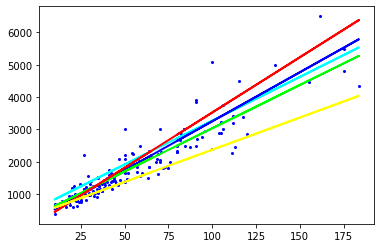

In [24]:
#la création d'un modèle par arrondissement est effectivement plus performante qu'une regression à multparamètre dans cet exemple. 
#draw the price per surface points
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 2)
#draw the regression line per model per model 
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color="#00FFFF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color="#0000FF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color="#00FF00", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color="#FF0000", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color="#FFFF00", linewidth = 2)

In [25]:
#variance and bias decomposition to see the impact on the model performance
from mlxtend.evaluate import bias_variance_decomp
#estimate bias and variance


In [26]:
data  = house_data.values
dataY = house_data["price"].values
#yvar = dataY[:, :-1]
xvar = [data[:-1]]

#tryout split the dataset into 80/20 for training and testing. 
from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(xvar, yvar, train_size=0.8)

model = linear_model.LinearRegression()
#model.fit(xtrain[0], ytrain[0])
#model.score(xtest[0], ytest[0])
#mse, bias, var = bias_variance_decomp(model, xtrain, ytrain, xtest, ytest, loss='mse', num_rounds=200, random_seed=1)
xvar

[array([[1.820e+03, 4.610e+01, 1.000e+00],
        [1.750e+03, 4.100e+01, 1.000e+00],
        [1.900e+03, 5.500e+01, 1.000e+00],
        ...,
        [7.000e+02, 1.000e+01, 1.000e+01],
        [1.280e+03, 3.400e+01, 1.000e+01],
        [1.545e+03, 6.500e+01, 1.000e+01]])]

In [39]:
from mlxtend.data import boston_housing_data
X_boston, y_boston = boston_housing_data()

In [52]:
#Raw example 

xframe = pd.DataFrame(X_boston)
xframe.describe()

X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.3,shuffle=True)
model_for_bias = linear_model.LinearRegression()

mse, avg_bias, avg_var = bias_variance_decomp(model_for_bias, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)
print(type(X_train))


<class 'numpy.ndarray'>


In [74]:
#arguments and results have to be numpy arrays and not dataframe for bias_variance to work

X = house_data[["surface", "arrondissement"]].to_numpy()
y = house_data["price"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
model_for_bias = linear_model.LinearRegression()

model_for_bias.fit(X_train, y_train)
R2 = model_for_bias.score(X_test, y_test)
print(model_for_bias.predict([[50, 4]]))
print("R2", R2)
mse, avg_bias, avg_var = bias_variance_decomp(model_for_bias, X_train, y_train, X_test, y_test, loss='mse')

print("mse", mse, "bias", avg_bias, "var", avg_var)

[1709.86216866]
R2 0.8865918217106327
mse 182489.13075620285 bias 180397.98061141782 var 2091.1501447850947


In [102]:
#doing the same work for model per arrondissement

X = house_data[["surface", "arrondissement"]]
y = house_data["price"]
lrs = []
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)  

for arr in np.unique(X["arrondissement"]):
  #on sample le dataset sur l'arrondissement en question 

   
  indexes = X["arrondissement"]==arr
  

  X_arr = X[indexes].to_numpy()
  #X_arr = X_arr["surface"].to_numpy()
  y_arr = y[indexes].to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, train_size=0.8)    
  #print(xtrain[train_arr]["surface"].to_numpy())
  #xtest_arr = xtest[test_arr]["surface"].to_numpy()
  #ytest_arr = ytest[test_arr].to_numpy()
  lr = linear_model.LinearRegression()
  lr.fit(X_train, y_train)
  R2 = (1-lr.score(X_test, y_test))*100
  lrs_score.append((lr.score(X_test, y_test))*100)
  mse, avg_bias, avg_var = bias_variance_decomp(lr, X_train, y_train, X_test, y_test, loss='mse')
  print(arr, "R2:", round(R2, 2), "%", "mse:", round(mse, 2), "bias:", round(avg_bias, 2), "var:", round(avg_var, 2))  
  lrs.append(lr)
    

1.0 R2 32.28 % mse 223023.82 bias 219290.63 var 3733.19
2.0 R2 23.76 % mse 209415.89 bias 206188.82 var 3227.06
3.0 R2 12.02 % mse 50327.07 bias 48307.01 var 2020.06
4.0 R2 9.16 % mse 119949.06 bias 114230.25 var 5718.81
10.0 R2 10.0 % mse 37493.36 bias 37006.08 var 487.27
